In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [62]:
rng = np.random.RandomState(1)
x = rng.rand(5, 10)
# manual_cov = np.dot(x.T, x)/x.shape[0]
np_cov = np.corrcoef(x, rowvar=False)

In [65]:
whiten = True
x_centered = x - np.mean(x, axis=0)
if whiten:
    x_whitened = x_centered / np.std(x_centered, axis=0)
    print(np.dot(x_whitened.T, x_whitened)/x_centered.shape[0])
else:
    print(np.dot(x_centered.T, x_centered)/x_centered.shape[0])

[[ 1.          0.77936826 -0.49087146  0.43951391 -0.11217774  0.43686441
   0.08811289 -0.824618    0.46531591 -0.31536419]
 [ 0.77936826  1.         -0.66741593  0.22901123  0.11191961  0.59629436
  -0.54926674 -0.97358837  0.45634345  0.07438669]
 [-0.49087146 -0.66741593  1.          0.0190645   0.58063755 -0.01123038
   0.44986708  0.65128114 -0.84164491  0.40882521]
 [ 0.43951391  0.22901123  0.0190645   1.         -0.15314476  0.74484961
   0.33785124 -0.09171284 -0.37695743 -0.49020604]
 [-0.11217774  0.11191961  0.58063755 -0.15314476  1.          0.38860234
  -0.30347732 -0.12246845 -0.53864829  0.91221339]
 [ 0.43686441  0.59629436 -0.01123038  0.74484961  0.38860234  1.
  -0.25595082 -0.44838756 -0.40617573  0.13409098]
 [ 0.08811289 -0.54926674  0.44986708  0.33785124 -0.30347732 -0.25595082
   1.          0.47429726 -0.21029524 -0.55039264]
 [-0.824618   -0.97358837  0.65128114 -0.09171284 -0.12246845 -0.44838756
   0.47429726  1.         -0.56461023 -0.09725522]
 [ 0.465

In [66]:
np_cov

array([[ 1.        ,  0.77936826, -0.49087146,  0.43951391, -0.11217774,
         0.43686441,  0.08811289, -0.824618  ,  0.46531591, -0.31536419],
       [ 0.77936826,  1.        , -0.66741593,  0.22901123,  0.11191961,
         0.59629436, -0.54926674, -0.97358837,  0.45634345,  0.07438669],
       [-0.49087146, -0.66741593,  1.        ,  0.0190645 ,  0.58063755,
        -0.01123038,  0.44986708,  0.65128114, -0.84164491,  0.40882521],
       [ 0.43951391,  0.22901123,  0.0190645 ,  1.        , -0.15314476,
         0.74484961,  0.33785124, -0.09171284, -0.37695743, -0.49020604],
       [-0.11217774,  0.11191961,  0.58063755, -0.15314476,  1.        ,
         0.38860234, -0.30347732, -0.12246845, -0.53864829,  0.91221339],
       [ 0.43686441,  0.59629436, -0.01123038,  0.74484961,  0.38860234,
         1.        , -0.25595082, -0.44838756, -0.40617573,  0.13409098],
       [ 0.08811289, -0.54926674,  0.44986708,  0.33785124, -0.30347732,
        -0.25595082,  1.        ,  0.47429726

(-3, 3)

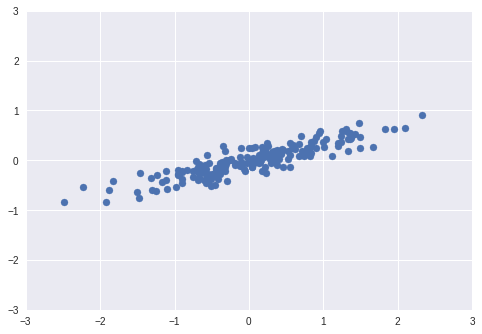

In [142]:
# get some 2-dimensional dataset
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# plot it
ax = plt.gca()
ax.scatter(x[:, 0], x[:, 1])
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))

In [143]:
# PCA preprocessing

# zero mean
mean = np.mean(x, axis=0)
x -= mean

# unit variance
var = np.std(x, axis=0)
x /= var

(-3, 3)

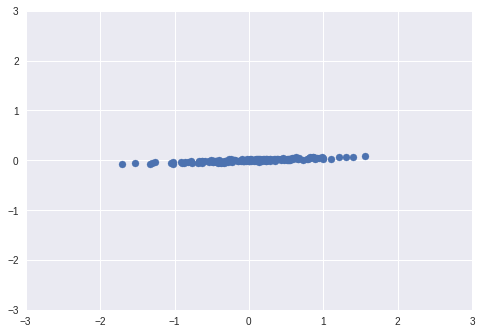

In [144]:
ax = plt.gca()
ax.scatter(x[:,0], x[:,1])
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))

[(31.347698715048775, array([ 0.99879796, -0.0490167 ])), (0.019825829193760983, array([ 0.0490167 ,  0.99879796]))]


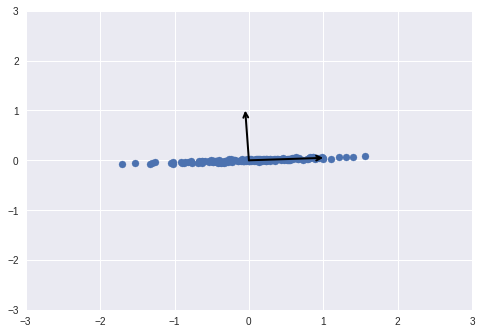

In [145]:
# compute the covariance matrix
cov = np.zeros((x.shape[1], x.shape[1]))

norm = 1./x.shape[1]

for i in range(x.shape[0]):
    cov += norm * np.dot(np.matrix(x[i]).T, np.matrix(x[i]))


# get eigendecomposition
eigenvals, eigenvecs = np.linalg.eig(cov)

print(list(zip(eigenvals, eigenvecs)))

ax = plt.gca()
ax.scatter(x[:,0], x[:,1])
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))

# plot eigenvecs
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)
ax.annotate('', eigenvecs[:,0], [0., 0.], arrowprops=arrowprops)
ax.annotate('', eigenvecs[:,1], [0., 0.], arrowprops=arrowprops)


In [146]:
ppal_eigenvec = eigenvecs[:,0]
ppal_eigenval = eigenvals[0]

# transform dataset
x_transformed = np.zeros((x.shape[0],))

for i in range(x.shape[0]):
    x_transformed[i] = np.dot(ppal_eigenvec, x[i,:])

print(ppal_eigenval, ppal_eigenvec)
x_transformed

31.347698715 [ 0.99879796  0.0490167 ]


array([ -4.47443079e-01,   6.31452628e-01,  -4.30423150e-01,
        -1.53578138e+00,  -3.37931118e-01,  -6.74104540e-01,
        -4.80645383e-01,   8.64889282e-01,   2.30748890e-01,
        -1.26278968e+00,   4.31973170e-01,  -4.18560341e-01,
        -3.07972321e-01,   9.53256348e-02,   2.33875294e-01,
        -4.83931173e-01,   6.78650841e-01,   2.05308670e-01,
         4.58117236e-01,   5.47181210e-01,   9.95704868e-01,
         1.72951726e-01,  -3.65441836e-01,   9.83701560e-01,
        -3.24764454e-01,  -3.84652390e-01,  -4.41493677e-01,
         2.76200222e-02,  -9.93866443e-02,  -3.60133383e-02,
         1.06791251e-01,   6.16145501e-01,  -2.71478724e-01,
        -6.30264997e-01,  -9.17688289e-01,  -2.82513182e-01,
        -3.73462985e-01,   5.91192990e-01,  -3.20961470e-01,
        -4.25971938e-01,  -2.34863362e-01,  -2.28274517e-01,
        -4.30209552e-01,   1.27683350e-01,   3.34237834e-01,
         3.54020101e-01,   8.98075249e-01,  -4.87750841e-01,
        -1.06810543e-01,

# PCA with sklearn

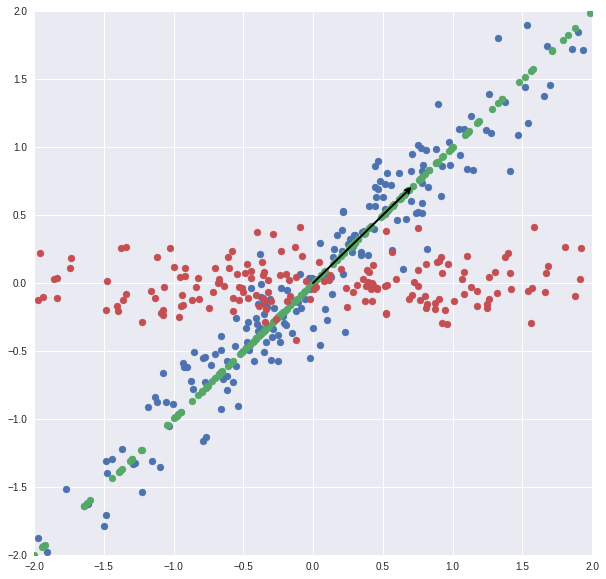

In [7]:
from sklearn.decomposition import PCA

rng = np.random.RandomState(1234)

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

X -= X.mean(axis=0)
X /= X.std(axis=0)

# whiten does not refer to the whitening of the raw data, but of the resulting transformed vectors
pca_model_ej = PCA(n_components=2, whiten=False)
pca_model_ej.fit(X)

def create_plt_figure(figsize=(5,5)):
    fig = plt.figure(figsize=figsize)
    return fig.add_subplot(1,1,1)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

ax = create_plt_figure((10,10))
ax.scatter(X[:,0], X[:,1])
ax.set_ylim((-2,2))
ax.set_xlim((-2,2))

# ppal component 1
pc1 = pca_model_ej.mean_ + pca_model_ej.components_[0,:]
draw_vector(pca_model_ej.mean_, pc1)

# plot projections to one PCA dimension
# the 1st dot product will give me the length, then i take that and i multiply it by the pca component unit vector
x_trans_manual = np.dot(np.matrix(X.dot(pc1)).T, np.matrix(pc1))
ax.scatter(np.array(x_trans_manual[:,0]).reshape(-1,), np.array(x_trans_manual[:,1]).reshape(-1,))

# these are the two dimensions returned by the PCA model
# these are equivalent to projecting the original data to the 2-principal components (in this case i wont need the
# 2nd dot product of the above formula)
# Also, if i let the PCA model whiten, then the resulting transformed data wont match!!
x_trans_auto = pca_model_ej.transform(X)
ax.scatter(np.array(x_trans_auto[:,0]).reshape(-1,), np.array(x_trans_auto[:,1]).reshape(-1,))